**Librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

# **Obtención de datos**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [125]:
#Los datos se importan desde una carpeta de google drive
data = pd.read_csv('/content/drive/MyDrive/Curso Data Science/Desafío 15/Set de datos/data.csv')

# **Limpieza y preparación de datos**

In [ ]:
#Visualización de los datos tal como fueron descargados de la fuente
data.head()

In [126]:
#Preparación de los datos para su posterior análisis
data = data.drop(columns = ["id"]) #no es una columna que sirva para el análisis
data.rename(columns = {"diagnosis": "diagnóstico","radius_mean":"radio medio",	"texture_mean":"textura media", "perimeter_mean":"perímetro medio",	"area_mean":"área media",
                       "smoothness_mean":"suavidad media", "compactness_mean":"compactibilidad media",	"concavity_mean":"concavidad media",
                       "concave points_mean":"puntos_cóncavos medios", "symmetry_mean":"simetría media","fractal_dimension_mean":"dimensión_fractal media",
                       "radius_se":"radio se", "texture_se":"textura se", "perimeter_se":"perímetro se",	"area_se":"área se",
                       "smoothness_se":"suavidad se", "compactness_se":"compactibilidad se",	"concavity_se":"concavidad se",
                       "concave points_se":"puntos_cóncavos se", "symmetry_se":"simetría se","fractal_dimension_se":"dimensión_fractal se",
                       "radius_worst":"peor radio","texture_worst":"peor textura", "perimeter_worst":"peor perímetro",	"area_worst":"peor área",
                       "smoothness_worst":"peor suavidad", "compactness_worst":"peor compactibilidad",	"concavity_worst":"peor concavidad",
                       "concave points_worst":"peores puntos_cóncavos", "symmetry_worst":"peor simetría","fractal_dimension_worst":"peor dimensión_fractal",}, inplace = True)

In [127]:
data.diagnóstico.unique()

array(['M', 'B'], dtype=object)

In [128]:
#Mapeo de la variable diagnóstico para que sea cuantitativa y poder aplicar los modelos de machine learning
data["diagnóstico"] = data["diagnóstico"].map({'M':1,'B':0})

In [ ]:
data.info()

**Datos ausentes**

In [ ]:
data.isnull().sum()

In [ ]:
len(data)

In [ ]:
data.describe()

**Outliers**

In [ ]:
fig, ax = plt.subplots(9,2, figsize = (10,35))

#RADIO
ax[0,0].hist(data["radio"], bins = 100, color = "#F0534D")
ax[0,0].set(title = "Histograma",
       xlabel = "radio [mm]",
       ylabel = "Frecuencia")
x = data["radio"]
ax[0,1].boxplot(x.values, vert = False)
ax[0,1].set(title = "Boxplot",
       xlabel = "radio [mm]")

#TEXTURA
ax[1,0].hist(data["textura"], bins = 100, color = "#E455D0")
ax[0,0].set(xlabel = "textura", ylabel = "Frecuencia")
ax[1,1].boxplot(x.values, vert = False)
ax[1,1].set(xlabel = "textura")

#PERÍMETRO
ax[2,0].hist(data["perímetro"], bins = 100, color = "#FA508E")
ax[2,0].set(xlabel = "perímetro [mm]",
       ylabel = "frecuencia")
x = data["perímetro"]
x.dropna(inplace = True) #Se eliminan los registros vaciós
ax[2,1].boxplot(x.values, vert = False)
ax[2,1].set(xlabel = "perímetro [mm]")

#ÁREA
ax[3,0].hist(data["área"], bins = 100, color = "#D850FA")
ax[3,0].set(xlabel = "área [mm]",
       ylabel = "frecuencia")
x = data["área"]
ax[3,1].boxplot(x.values, vert = False)
ax[3,1].set(xlabel = "área [mm]")

#COMPACTIBILIDAD
ax[4,0].hist(data["compactibilidad"], bins = 100, color = "#A34DF0")
ax[4,0].set(xlabel = "compactibilidad",
       ylabel = "frecuencia")
x = data["compactibilidad"]
ax[4,1].boxplot(x.values, vert = False)
ax[4,1].set(xlabel = "compactibilidad")

#CONCAVIDAD
ax[5,0].hist(data["concavidad"], bins = 100, color = "#EF81C0")
ax[5,0].set(xlabel = "concavidad [mm]",
       ylabel = "frecuencia")
x = data["concavidad"]
ax[5,1].boxplot(x.values, vert = False)
ax[5,1].set(xlabel = "concavidad [mm]")

#PUNTOS_CÓNCAVOS
ax[6,0].hist(data["puntos_cóncavos"], bins = 100, color = "#E450FA")
ax[6,0].set(xlabel = "puntos_cóncavos [mm]",
       ylabel = "frecuencia")
#Análisis de la variable duración
x = data["puntos_cóncavos"]
ax[6,1].boxplot(x.values, vert = False)
ax[6,1].set(xlabel = "puntos_cóncavos")

#SIMETRÍA
ax[7,0].hist(data["simetría"], bins = 100, color = "#FA2ADD")
ax[7,0].set(xlabel = "simetría",
       ylabel = "frecuencia")
x = data["simetría"]
ax[7,1].boxplot(x.values, vert = False)
ax[7,1].set(title = "Boxplot de la variable 'simetría'",
       xlabel = "simetría [mm]")

#DIMENSIÓN FRACTAL
ax[8,0].hist(data["dimensión_fractal"], bins = 100, color = "#E354D0")
ax[8,0].set(xlabel = "dimensión fractal",
       ylabel = "frecuencia")
x = data["dimensión_fractal"]
ax[8,1].boxplot(x.values, vert = False)
ax[8,1].set(xlabel = "simetría [mm]")

plt.show()

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(x = data["diagnóstico"])
plt.xlabel("Diagnóstico")
plt.title("Recuento")

# **EDA**

**Encoding**

In [ ]:
features_mean=list(data.columns[1:11])
#Se separan los datos en función de su diagnóstico
dfM=data[data["diagnóstico"] == 1]
dfB=data[data["diagnóstico"] == 0]

In [ ]:
#Stack the data
plt.rcParams.update({"font.size": 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.8,stacked=True, label=["M","B"],color=["#943424","#239464"])
    ax.legend(loc="upper right")
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [63]:
x = data["diagnóstico"]
data = data.drop(columns = "diagnóstico")

In [ ]:
data

In [65]:
scaler = StandardScaler()
scaler.fit(data)

features_scaled = scaler.transform(data)
features_scaled = pd.DataFrame(data=features_scaled,
                               columns=data.columns)

df_scaled = pd.concat([features_scaled, x], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [67]:
df_scaled

,radio medio,textura media,perímetro medio,área media,suavidad media,compactibilidad media,concavidad media,puntos_cóncavos medios,simetría media,dimensión_fractal media,...,peor perímetro,peor área,peor suavidad,peor compactibilidad,peor concavidad,peores puntos_cóncavos,peor simetría,peor dimensión_fractal,Unnamed: 32,diagnóstico
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,NaN,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,NaN,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,NaN,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,NaN,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,NaN,1
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,NaN,1
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,NaN,1
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,NaN,1


In [ ]:
df_scaled_melt = pd.melt(df_scaled, id_vars="diagnóstico",var_name='features', value_name='value')
df_scaled_melt.head(3)

In [ ]:
df_scaled_melt

In [109]:
def violin_plot(features, name):
    #Creación de la consulta
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    #Datos para la visualización
    data1 = df_scaled_melt.query(query)

    #Gráfico
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='features',
                   y='value',
                   hue='diagnóstico',
                   data=data1,
                   split=True,
                   inner="quart")
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Atributos")
    plt.ylabel("Valor estandarizado")


def swarm_plot(features, name):
    #Creación de la consulta
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    #Datos para la visualización
    data1 = df_scaled_melt.query(query)

    #Gráfico
    plt.figure(figsize=(12, 6))
    sns.swarmplot(x='features', y='value', hue='diagnóstico', data=data1)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")


def box_plot(features, name):
    #Creación de la consulta
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    #Datos para la visualización
    data1 = df_scaled_melt.query(query)

    #Gráfico
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='features', y='value', hue='diagnóstico', data=data1)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")

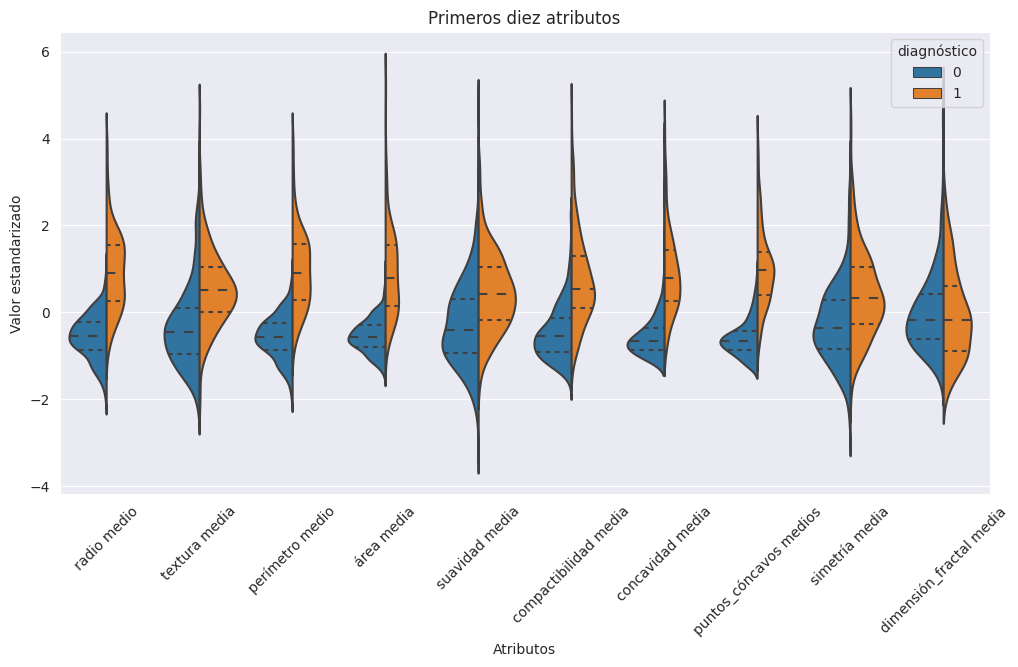

In [107]:
violin_plot(data.columns[0:10], "Primeros diez atributos")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 68.9% of the points cannot be plac

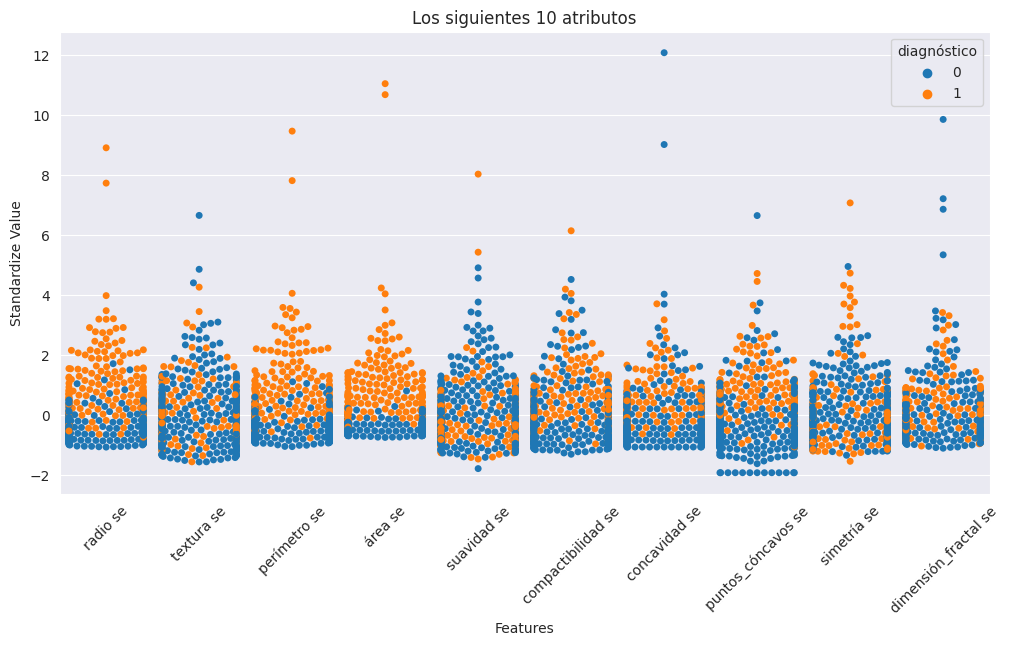

In [110]:
swarm_plot(data.columns[10:20], "Los siguientes 10 atributos")

In [ ]:
box_plot(data.columns[20:30], "Box Plot of the Last 10 Features")

In [98]:
def correlation(var):
    # Print correlation
    print("Correlation: ", data[[var[0], var[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(6, 6))
    sns.jointplot(x = data[(var[0])], y = data[(var[1])], kind='reg')

Correlation:  0.9865068039913907


<Figure size 600x600 with 0 Axes>

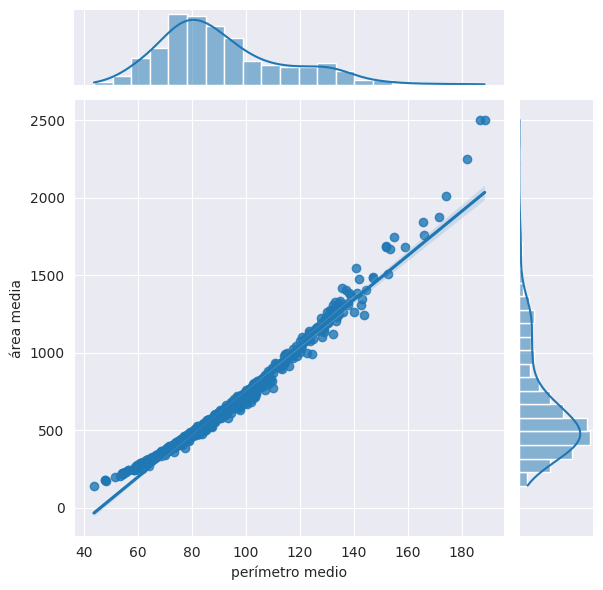

In [99]:
correlation(['perímetro medio','área media'])

Correlation:  0.9213910263788588


<Figure size 600x600 with 0 Axes>

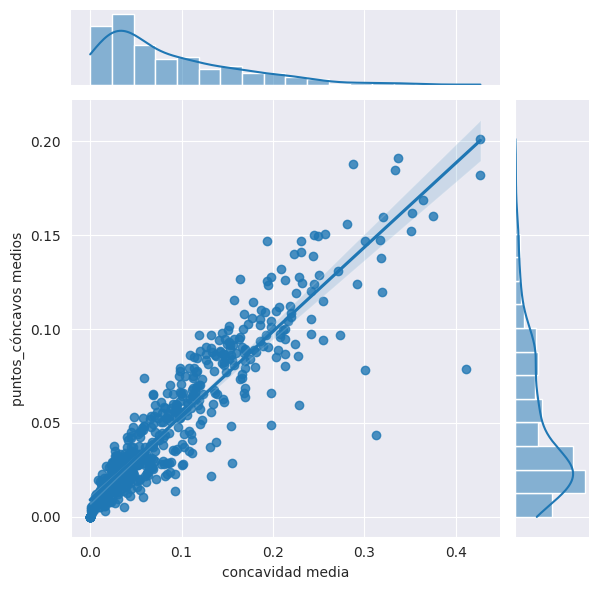

In [100]:
correlation(["concavidad media","puntos_cóncavos medios"])

Correlation:  0.537848206253609


<Figure size 600x600 with 0 Axes>

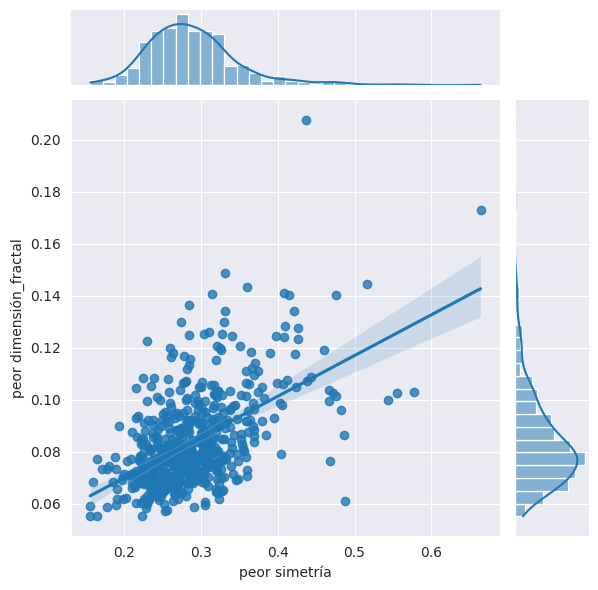

In [102]:
correlation(["peor simetría", "peor dimensión_fractal"])

<ipython-input-112-e349e18e82e8>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat, dtype=np.bool)


<Axes: >

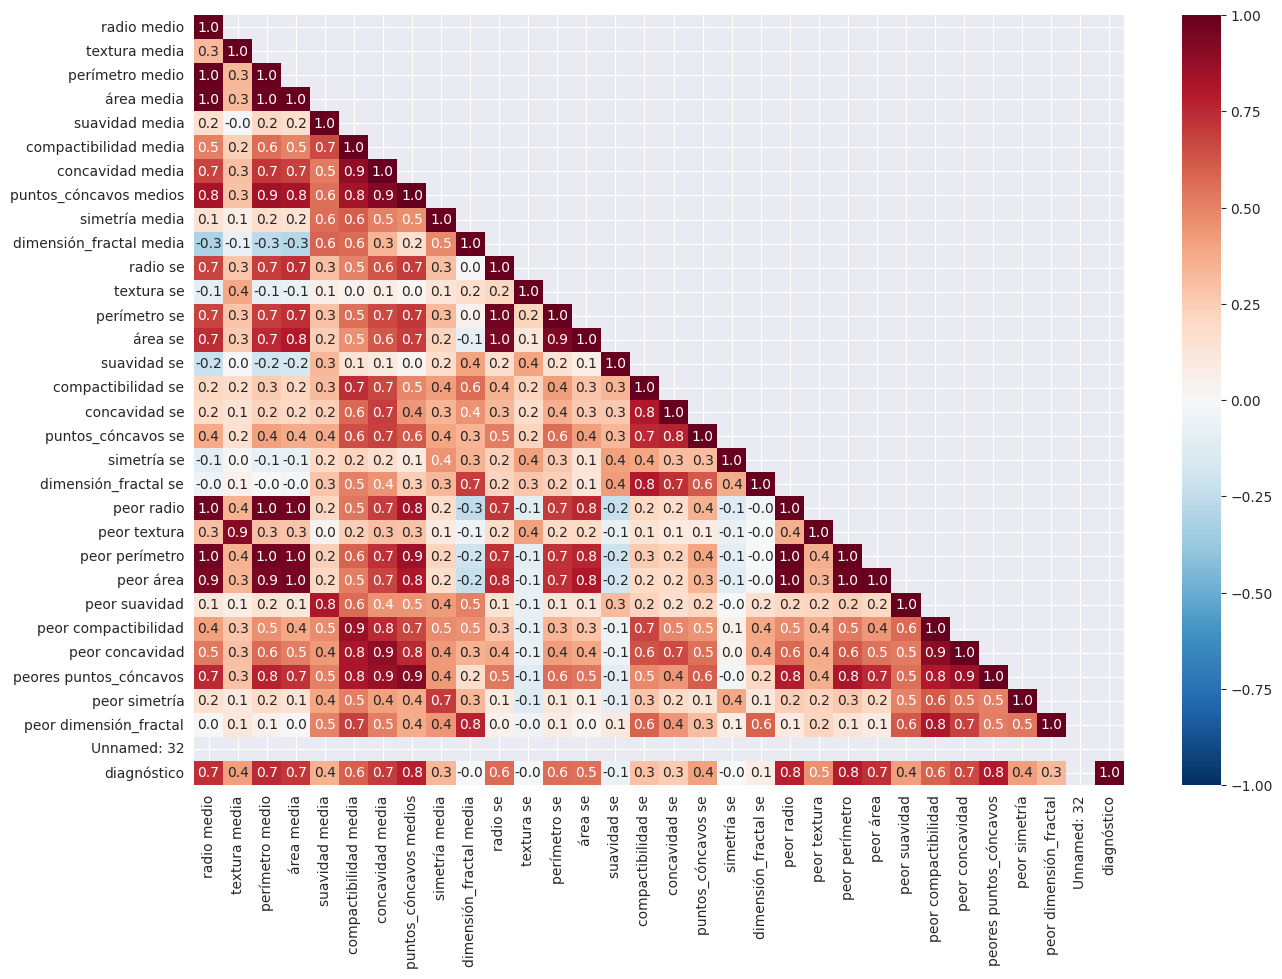

In [112]:
#Matrix de correlación
corr_mat = data.corr()

# Create mask
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1,
            mask=mask)

<Axes: >

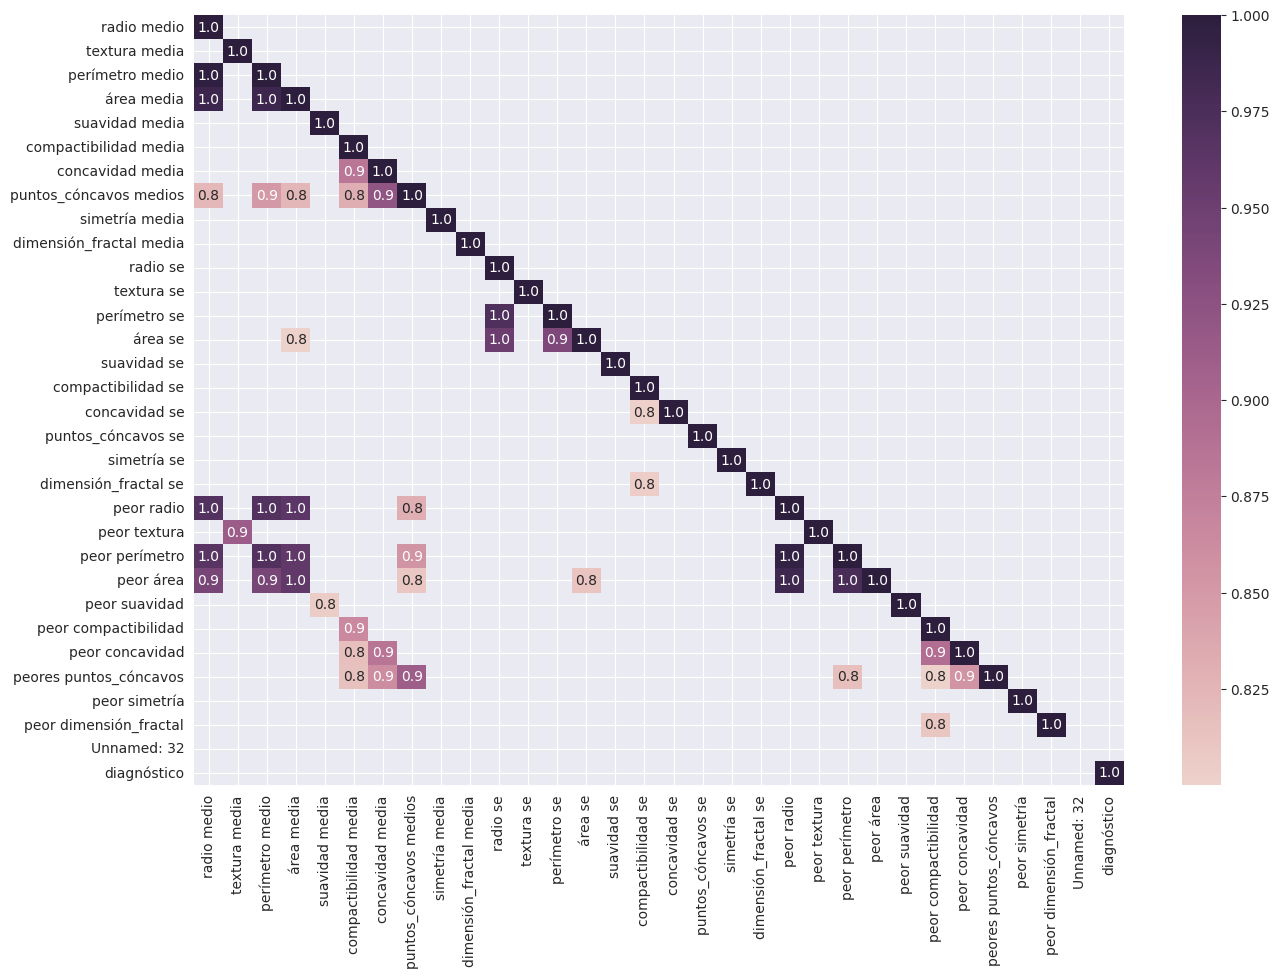

In [113]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat > 0.8], annot=True,
            fmt='.1f', cmap=sns.cubehelix_palette(200), mask=mask)

# **Creación del modelo**

In [129]:
y = data["diagnóstico"]
y = pd.DataFrame(data = y)

In [130]:
data = data.drop(columns = ["Unnamed: 32", "diagnóstico"])

In [166]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(chi2, k=5)
feature_selection.fit(data, y)
selected_features = data.columns[feature_selection.get_support()]
print("The five selected features are: ", list(selected_features))

The five selected features are:  ['perímetro medio', 'área media', 'área se', 'peor perímetro', 'peor área']


In [132]:
X = pd.DataFrame(feature_selection.transform(data),
                 columns=selected_features)
X.head()

,perímetro medio,área media,área se,peor perímetro,peor área
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0


In [ ]:
y

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [140]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

<ipython-input-140-d3aa3026f585>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [144]:
from sklearn.metrics import confusion_matrix, classification_report
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Reporte:\n", classification_report(y_test, y_pred))

Matriz de confusión:
 [[117   4]
 [  3  64]]


Reporte:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       0.94      0.96      0.95        67

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



In [145]:
from sklearn.decomposition import PCA

In [ ]:
features_scaled.head(5)

In [153]:
X_scaled = features_scaled

In [154]:
X_scaled = X_scaled.drop(columns = "Unnamed: 32")

KeyError: ignored

In [ ]:
X_scaled

In [157]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

Text(0.5, 0, 'Second Principal Component')

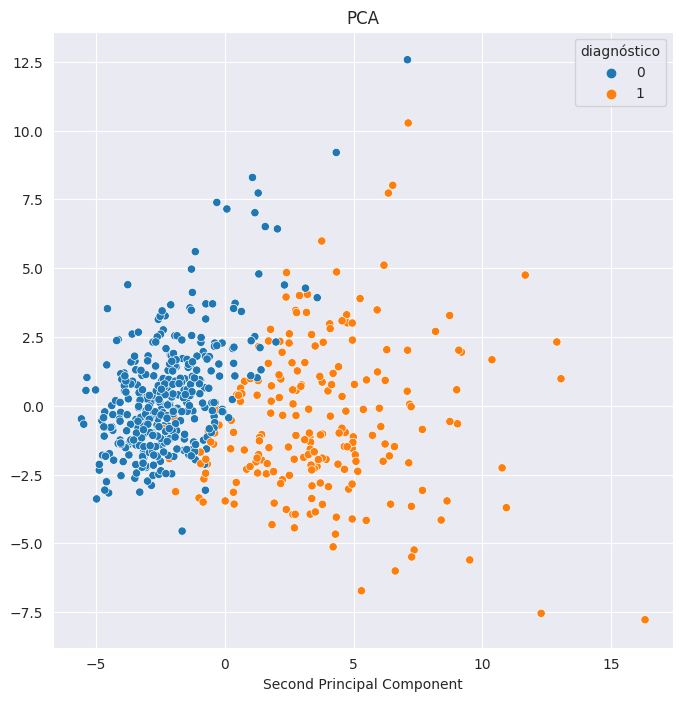

In [159]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue=y["diagnóstico"])
plt.title("PCA")
plt.xlabel("First Principal Component")
plt.xlabel("Second Principal Component")

In [160]:
X = X_pca
y = y["diagnóstico"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [161]:
from sklearn.svm import SVC

In [162]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [163]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [164]:
y_pred = grid.predict(X_test)

In [165]:
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Reporte:\n",classification_report(y_test, y_pred))

Matriz de confusión:
 [[116   5]
 [  5  62]]


Reporte:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       121
           1       0.93      0.93      0.93        67

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188

